In [1]:
from utils import *
from data import load_mask
import tensorflow as tf
from matplotlib.colors import ListedColormap

2024-03-17 07:14:53.861651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 07:14:53.861710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 07:14:53.864337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 07:14:53.876025: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 07:14:54.905970: W tensorflow/compiler/tf2

In [2]:
CROP_SIZE = (224,224,10)
MODEL_PATH = "../unet-0.keras"
MASKS_DIR = "./masks"
if not os.path.exists(MASKS_DIR):
    os.makedirs(MASKS_DIR)

In [ ]:
model = tf.keras.models.load_model(MODEL_PATH)

In [ ]:
for i in range(1, PT_NUM+1):
    img = nib_from_int(i)
    total_frames = training_data_DF.loc[i-1,'NbFrame']
    for j in range(int(total_frames)):
        ptnum = str(i).zfill(3)
        framenum = str(j+1).zfill(2)
        save_dir = os.path.join(MASKS_DIR, f"patient{ptnum}")
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_path = os.path.join(save_dir, f"patient{ptnum}_frame{framenum}_gt.nii")
        if os.path.exists(save_path):
            continue;
        frame = img.get_fdata()[:,:,:,j]
        frame = img4d_extraction(nib.Nifti1Image(frame, img.affine), CROP_SIZE)
        frame = np.expand_dims(frame, axis=0)
        img_mask = model.predict(frame)
        affine = np.diag([1.25, 1.25, 10.0, 1.0])
        nifti_mask = nib.Nifti1Image(img_mask, affine=affine)
        nib.save(nifti_mask, save_path)

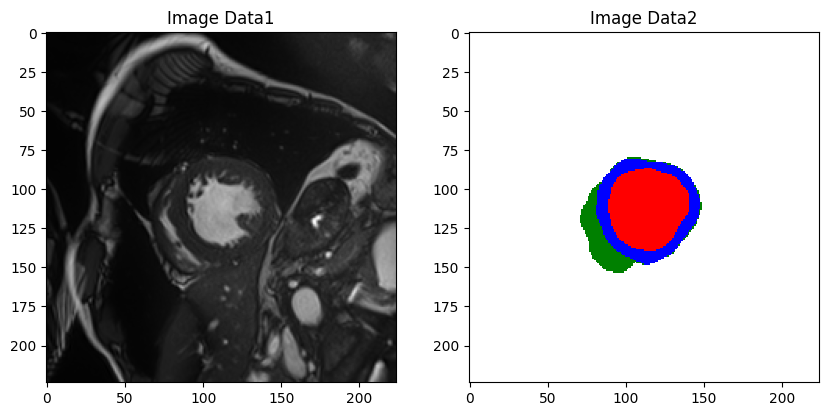

In [3]:
plot_gen_mask(5,8)

In [ ]:
for i in range(PT_NUM+1, PT_NUM+TEST_PT_NUM+1):
    img = nib_from_int(i, testing=True)
    total_frames = testing_data_DF.loc[i-PT_NUM-1,'NbFrame']
    for j in range(int(total_frames)):
        ptnum = str(i).zfill(3)
        framenum = str(j+1).zfill(2)
        save_dir = os.path.join(MASKS_DIR, f"patient{ptnum}")
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_path = os.path.join(save_dir, f"patient{ptnum}_frame{framenum}_gt.nii")
        if os.path.exists(save_path):
            continue;
        frame = img.get_fdata()[:,:,:,j]
        frame = img4d_extraction(nib.Nifti1Image(frame, img.affine), CROP_SIZE)
        frame = np.expand_dims(frame, axis=0)
        img_mask = model.predict(frame)
        affine = np.diag([1.25, 1.25, 10.0, 1.0])
        nifti_mask = nib.Nifti1Image(img_mask, affine=affine)
        nib.save(nifti_mask, save_path)